# Notebook 001: Examine Available Shapefiles

In this notebook, all Boston-area shapefiles available in the `../data/raw/shapefile` directory are plotted for inspection to help and determine which shapefiles may be of use in this analysis. 

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline

# import interactive shell to display multiple outputs per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# set data root for all relative paths
DATA_ROOT = '../data/'
shapefile_root = os.path.join(DATA_ROOT, 'raw/shapefile')

# set figures root for saving plots if desired
FIGURES_ROOT = '../figures/shapefile'

In [3]:
# generate list of shapefile_root sub-directories
shapefile_subdirs = [subdir for subdir in os.listdir(shapefile_root) if '.zip' not in subdir]

# generate list of shapefile names for all sub-directories
shapefiles = [
    [
        shapefile for shapefile in os.listdir(os.path.join(shapefile_root, subdir))
        if '.shp' in shapefile
    ][0] for subdir in shapefile_subdirs
]

# make dictionary containing all available shapefile geopandas-dataframes
shapefiles_dict = {
    subdir: gpd.read_file(os.path.join(shapefile_root, subdir, shapefile))
    for subdir, shapefile in zip(
        shapefile_subdirs,
        shapefiles
    )
}

In [4]:
# inspect sub-directories and available shapefiles
print('{}\n'.format(shapefile_root))

print('shapefile sub-directories:\n')
for subdir in shapefile_subdirs:
    print('\t{}'.format(subdir))

print('\navailable shapefiles:\n')
for shapefile in shapefiles:
    print('\t{}'.format(shapefile))
    
print(
    '\nThere are {} shapefiles in total available for plotting'.format(
        len(shapefiles_dict)
    )
)

../data/raw/shapefile

shapefile sub-directories:

	planning-districts
	sidewalk-centerlines
	street-segments
	zoning-subdistricts
	census-tracts
	water-features
	main-street-districts
	city-boundary
	boston-neighborhoods
	zipcodes
	sidewalk-inventory
	open-spaces
	zoning-districts

available shapefiles:

	Planning_Districts.shp
	Sidewalk_Centerline.shp
	Boston_Street_Segments.shp
	Zoning_Subdistricts.shp
	Census_2010_Tracts.shp
	Hydrography_Polygon.shp
	Main_Street_Districts.shp
	City_of_Boston_Boundary.shp
	Boston_Neighborhoods.shp
	ZIP_Codes.shp
	Sidewalk_Inventory.shp
	Open_Space.shp
	Zoning_Districts.shp

There are 13 shapefiles in total available for plotting


In [5]:
# define plot for generating shapefile plots

def plot_shapefile(shapefile_df, subdir, savefig=False):
    """
    Generates plot for shapefile dataframe, titled according to
    that dataframe's respective sub-directory
    """
    fig, ax = plt.subplots(figsize=(16,10))
    plt.title(
        '{} shapes'.format(subdir),
        fontsize=24
    )

    shapefile_df.plot(ax=ax, color='lightgray', edgecolor='k')

    plt.xlabel('lat', fontsize=18)
    plt.ylabel('lon', fontsize=18)
    plt.grid(":", alpha=0.4)
    plt.tight_layout()
    
    if savefig:
        if not os.path.exists(FIGURES_ROOT):
            os.mkdir(FIGURES_ROOT)
        plt.savefig(os.path.join(FIGURES_ROOT, ''.join([subdir,'.png'])))
    
    plt.show();

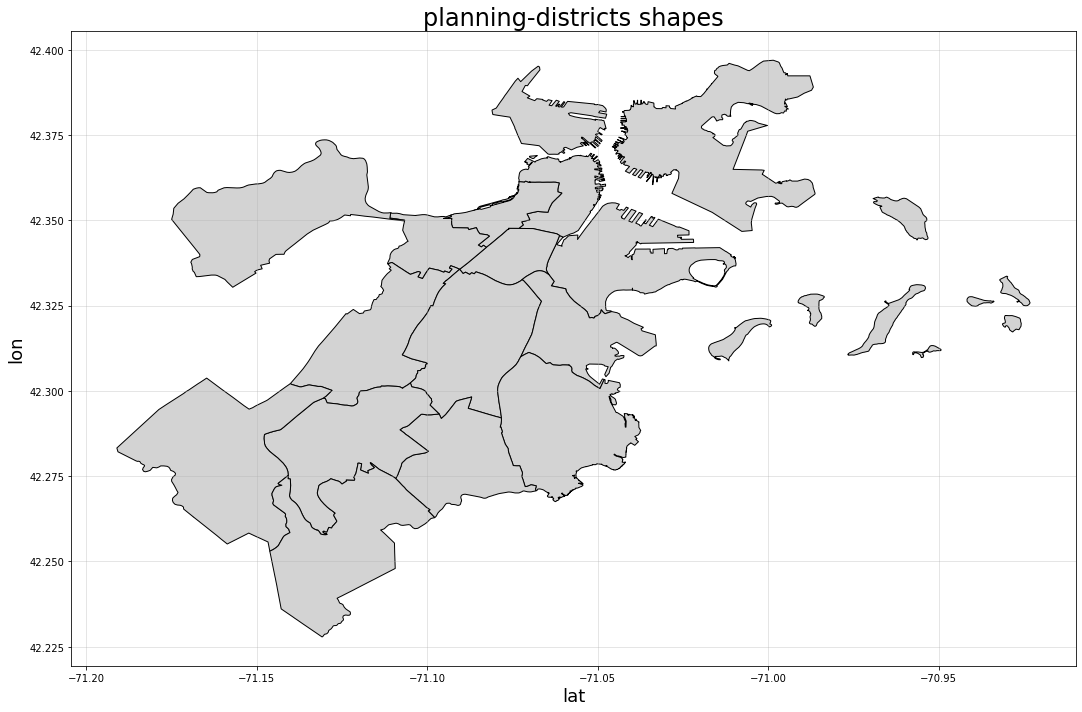

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 9 columns):
OBJECTID_1    17 non-null int64
OBJECTID      17 non-null int64
PLANNING_D    17 non-null int64
ID            17 non-null object
PD            17 non-null object
bragis92BR    17 non-null float64
SHAPESTAre    17 non-null float64
SHAPESTLen    17 non-null float64
geometry      17 non-null object
dtypes: float64(3), int64(3), object(3)
memory usage: 1.3+ KB


,OBJECTID_1,OBJECTID,PLANNING_D,ID,PD,bragis92BR,SHAPESTAre,SHAPESTLen,geometry
0,1,1,1,1,East Boston,1.321619e+08,1.321619e+08,127431.241660,(POLYGON ((-71.0405221616985 42.38248098687955...
1,2,2,2,2,Charlestown,3.851373e+07,3.851373e+07,56156.269664,POLYGON ((-71.07054192465648 42.37232450409416...
2,3,3,3,3,South Boston,8.575985e+07,8.575985e+07,89461.981964,POLYGON ((-71.05707730207348 42.34561539637299...
3,4,4,4,4,Central,3.597221e+07,3.597221e+07,51791.018425,(POLYGON ((-71.05914603234382 42.3677854404774...
4,5,5,5,5,Back Bay/Beacon Hill,2.542070e+07,2.542070e+07,39404.751559,POLYGON ((-71.07579629142838 42.35681270686213...


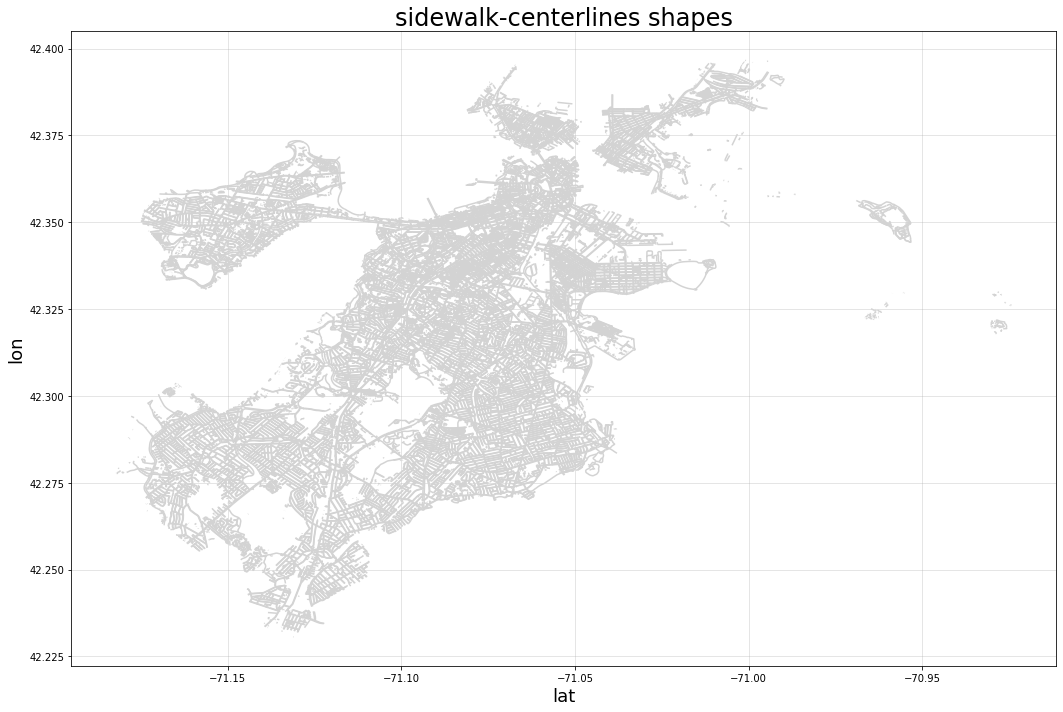

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 110031 entries, 0 to 110030
Data columns (total 4 columns):
OBJECTID      110031 non-null int64
TYPE          110031 non-null object
ShapeSTLen    110031 non-null float64
geometry      110031 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 3.4+ MB


,OBJECTID,TYPE,ShapeSTLen,geometry
0,1,Crosswalk centerline,64.029105,LINESTRING (-71.13285522764389 42.355360489693...
1,2,Crosswalk centerline,48.941826,LINESTRING (-71.12518552524404 42.366693362071...
2,3,Crosswalk centerline,27.003284,LINESTRING (-71.13479125907152 42.359696569323...
3,4,Crosswalk centerline,50.113763,LINESTRING (-71.13053577472787 42.361935770561...
4,5,Crosswalk centerline,33.144903,LINESTRING (-71.1328595878507 42.3569128313086...


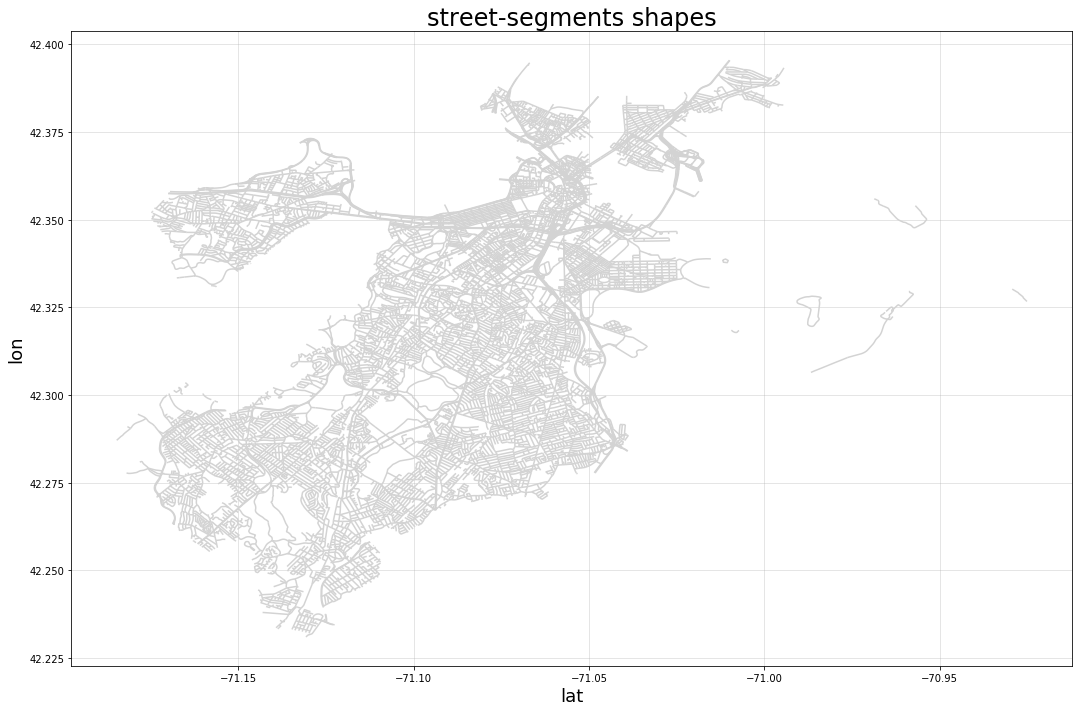

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 19055 entries, 0 to 19054
Data columns (total 43 columns):
OBJECTID      19055 non-null int64
SEGMENT_ID    19055 non-null int64
L_F_ADD       14258 non-null object
L_T_ADD       14258 non-null object
R_F_ADD       16146 non-null object
R_T_ADD       16146 non-null object
PRE_DIR       629 non-null object
ST_NAME       19020 non-null object
ST_TYPE       18106 non-null object
SUF_DIR       244 non-null object
MUN_L         19055 non-null object
MUN_R         19055 non-null object
CFCC          18951 non-null object
SPEEDLIMIT    19055 non-null int64
ONEWAY        8671 non-null object
HEIGHT        0 non-null object
WEIGHT        0 non-null object
WIDTH         0 non-null object
F_ZLEV        19055 non-null int64
T_ZLEV        19055 non-null int64
SHIELD        1224 non-null object
HWY_NUM       1224 non-null object
NBHD_L        19055 non-null object
NBHD_R        19055 non-null object
FT_COST       18979 non-null float64
TF_COS

,OBJECTID,SEGMENT_ID,L_F_ADD,L_T_ADD,R_F_ADD,R_T_ADD,PRE_DIR,ST_NAME,ST_TYPE,SUF_DIR,...,PLACE00_R,TRACT00_L,TRACT00_R,BLOCK00_L,BLOCK00_R,MCD00_L,MCD00_R,STREET_ID,SHAPElen,geometry
0,1,1,12,22,13,29,None,A,ST,None,...,07000,02127,02127,None,None,07000,07000,2,166.673187,LINESTRING (-71.05673543528182 42.340782275564...
1,2,2,24,42,31,43,None,A,ST,None,...,07000,02127,02127,None,None,07000,07000,2,162.142997,LINESTRING (-71.05632524039281 42.341123705544...
2,3,3,44,64,45,67,None,A,ST,None,...,07000,02127,02127,None,None,07000,07000,2,178.522006,LINESTRING (-71.05593862580247 42.341463852179...
3,4,4,66,72,69,71,None,A,ST,None,...,07000,02127,02127,None,None,07000,07000,2,196.841018,LINESTRING (-71.05550395885379 42.341832628363...
4,5,5,74,90,73,87,None,A,ST,None,...,07000,02127,02127,None,None,07000,07000,2,179.277949,LINESTRING (-71.05502002610159 42.342236197669...


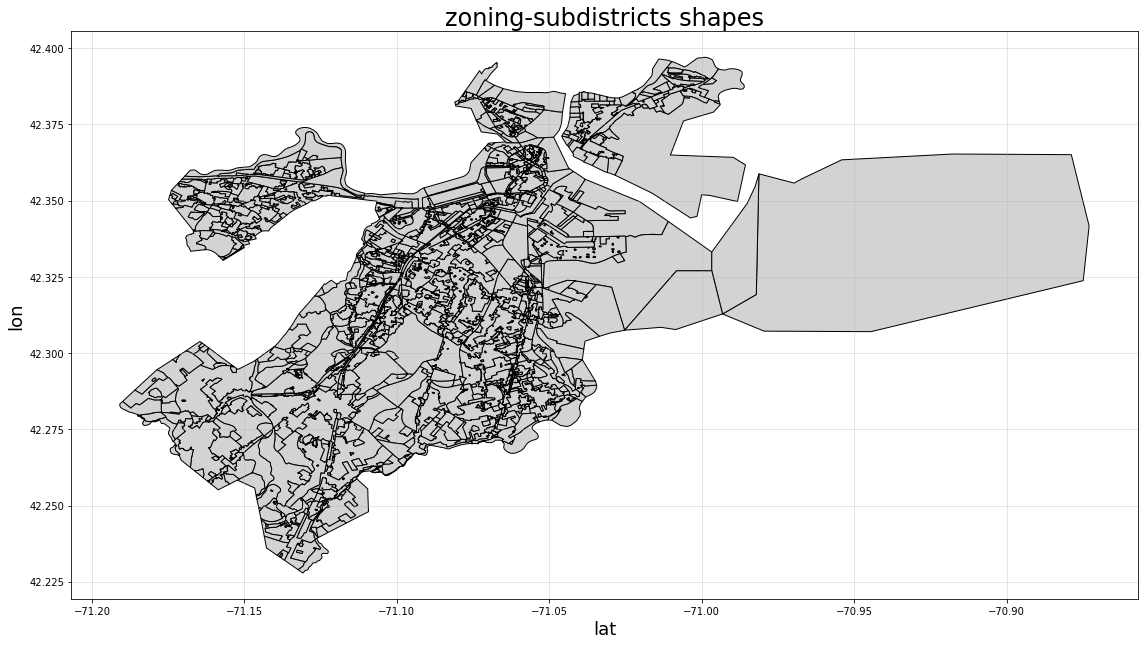

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 12 columns):
OBJECTID      1649 non-null int64
ZONE_         1648 non-null object
DISTRICT      1649 non-null object
MAPNO         1649 non-null object
ARTICLE       1649 non-null object
SUBDISTRIC    1649 non-null object
Unique_Cod    1649 non-null object
FAR           1195 non-null float64
Shape_STAr    1649 non-null int64
Shape_STLe    1649 non-null int64
Zone_Desc     1649 non-null object
geometry      1649 non-null object
dtypes: float64(1), int64(3), object(8)
memory usage: 154.7+ KB


,OBJECTID,ZONE_,DISTRICT,MAPNO,ARTICLE,SUBDISTRIC,Unique_Cod,FAR,Shape_STAr,Shape_STLe,Zone_Desc,geometry
0,59143,CC,Mission Hill Neighborhood,6D,59,Business,Mission Hill Neighborhood CC,3.0,0,0,Community Commercial,POLYGON ((-71.09451646281816 42.33244043424968...
1,59144,WM,South Boston Neighborhood,4F,68,Industrial,South Boston Neighborhood WM,2.0,0,0,Waterfront Manufacturing,POLYGON ((-71.03554411066089 42.33992389263747...
2,59145,M-4,South Boston,4,Underlying Zoning,Industrial,South Boston M-4,4.0,0,0,Restricted Manufacturing,"POLYGON ((-71.0421385497493 42.3462569178347, ..."
3,59146,D St. NDA,South Boston Neighborhood,4F,68,Mixed Use,South Boston Neighborhood D St. NDA,2.0,0,0,Neighborhood Development Area,POLYGON ((-71.04142638209957 42.34454863344008...
4,59147,SUMMER ST. LI,South Boston Neighborhood,4F,68,Industrial,South Boston Neighborhood Summer St. LI,3.0,0,0,Local Industrial,POLYGON ((-71.03770255121084 42.33811666220058...


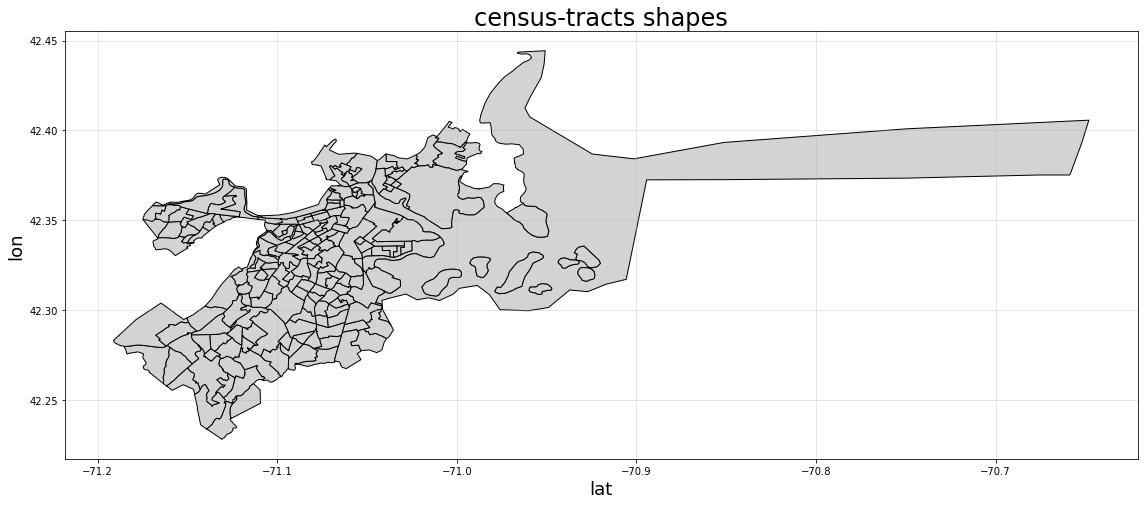

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 19 columns):
FID           181 non-null int64
OBJECTID      181 non-null int64
STATEFP10     181 non-null object
COUNTYFP10    181 non-null object
TRACTCE10     181 non-null object
GEOID10       181 non-null object
NAME10        181 non-null object
NAMELSAD10    181 non-null object
MTFCC10       181 non-null object
FUNCSTAT10    181 non-null object
ALAND10       181 non-null int64
AWATER10      181 non-null int64
INTPTLAT10    181 non-null object
INTPTLON10    181 non-null object
Shape_STAr    181 non-null float64
Shape_STLe    181 non-null float64
Shape__Are    181 non-null float64
Shape__Len    181 non-null float64
geometry      181 non-null object
dtypes: float64(4), int64(4), object(11)
memory usage: 26.9+ KB


,FID,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,Shape_STAr,Shape_STLe,Shape__Are,Shape__Len,geometry
0,1,1,25,025,010405,25025010405,104.05,Census Tract 104.05,G5020,S,363702,0,+42.3398654,-071.0896052,3.914568e+06,14629.550361,666099.906250,6036.192858,"POLYGON ((-71.0900876001992 42.3466656698382, ..."
1,2,2,25,025,010404,25025010404,104.04,Census Tract 104.04,G5020,S,136829,0,+42.3419667,-071.0886375,1.472714e+06,5277.643216,250612.402344,2176.592125,"POLYGON ((-71.0906605999872 42.3397746685099, ..."
2,3,3,25,025,010801,25025010801,108.01,Census Tract 108.01,G5020,S,127905,0,+42.3541193,-071.0770216,1.376667e+06,6166.497167,234357.902344,2542.042976,"POLYGON ((-71.0815955978202 42.3537126714488, ..."
3,4,4,25,025,010702,25025010702,107.02,Census Tract 107.02,G5020,S,299981,0,+42.3518354,-071.0755159,3.228780e+06,7818.852369,549614.046875,3224.572988,"POLYGON ((-71.07065559412069 42.3518626714467,..."
4,5,5,25,025,010204,25025010204,102.04,Census Tract 102.04,G5020,S,254706,0,+42.3462887,-071.1033879,2.741497e+06,7621.654206,466585.234375,3143.610963,"POLYGON ((-71.1068256058162 42.3487616697014, ..."


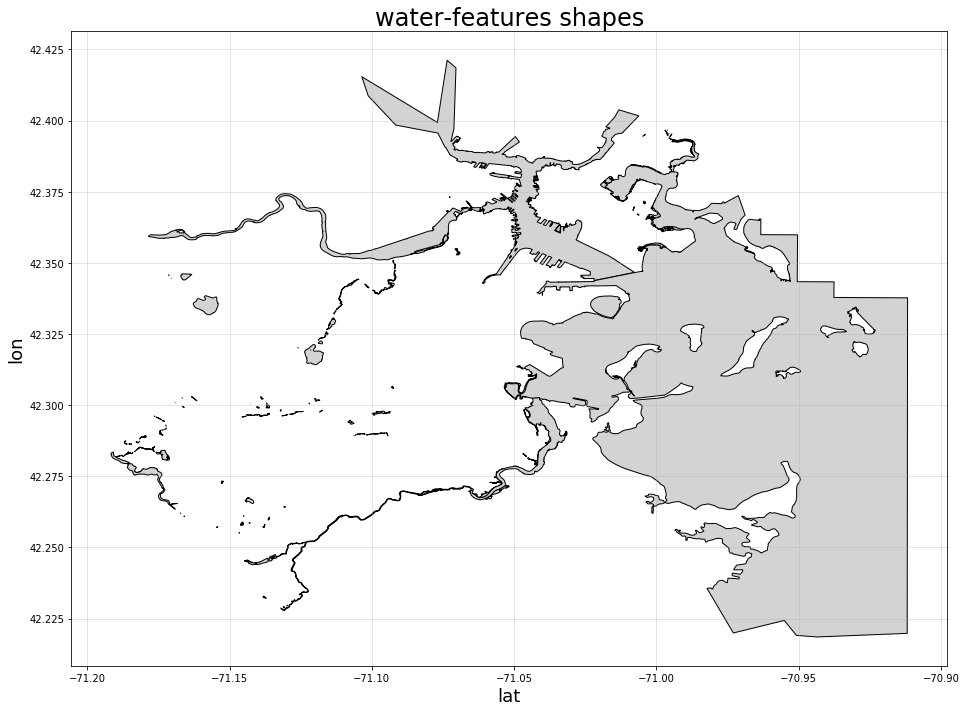

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 6 columns):
OBJECTID      226 non-null int64
TYPE          226 non-null object
NAME          15 non-null object
ShapeSTAre    226 non-null float64
ShapeSTLen    226 non-null float64
geometry      226 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 10.7+ KB


,OBJECTID,TYPE,NAME,ShapeSTAre,ShapeSTLen,geometry
0,1,Freshwater Wetland,None,35132.603027,1621.810733,POLYGON ((-71.06971813784678 42.35393250386652...
1,2,Freshwater Wetland,None,9818.098633,966.117056,POLYGON ((-71.07000358230418 42.35306844502543...
2,3,Pond or Lake,None,69386.737549,2750.120981,(POLYGON ((-71.0697359824477 42.35402610905912...
3,4,Freshwater Wetland,None,10841.604736,986.772807,POLYGON ((-71.06989045733756 42.35414785437474...
4,5,Pond or Lake,None,711.548950,165.382941,POLYGON ((-71.17138139093143 42.34575174281203...


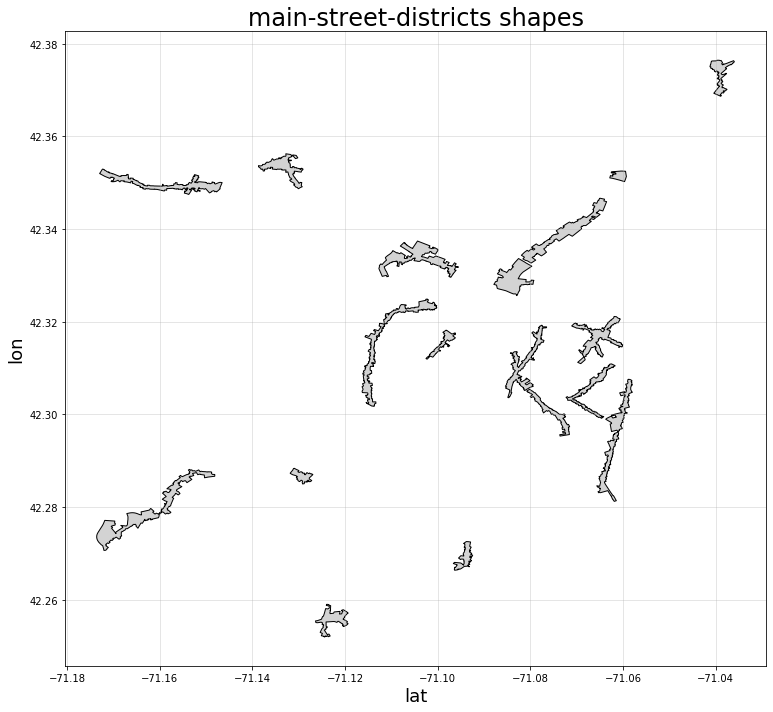

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
OBJECTID      20 non-null int64
ROW_ID        0 non-null object
NAME          20 non-null object
DIST_NAME     20 non-null object
SHAPESTAre    20 non-null float64
SHAPESTLen    20 non-null float64
EGISDNDmai    0 non-null object
EGISDNDm_1    0 non-null object
geometry      20 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 1.5+ KB


,OBJECTID,ROW_ID,NAME,DIST_NAME,SHAPESTAre,SHAPESTLen,EGISDNDmai,EGISDNDm_1,geometry
0,20,None,BRIGHTON,Brighton,3.141951e+06,24702.655471,None,None,POLYGON ((-71.17295712867937 42.35198554926392...
1,21,None,ALLSTON VILLAGE,Allston Village,2.049426e+06,13724.078554,None,None,POLYGON ((-71.13867848514485 42.35368724213969...
2,22,None,EAST BOSTON,East Boston,1.306261e+06,10611.081612,None,None,POLYGON ((-71.04092428939045 42.37626779660835...
3,23,None,CHINATOWN,Chinatown,5.375187e+05,3782.933705,None,None,"POLYGON ((-71.06250284326831 42.3523650385284,..."
4,24,None,WASHINGTON GATEWAY,Washington St Gateway,3.788376e+06,20234.513045,None,None,POLYGON ((-71.06505618017881 42.34667492359265...


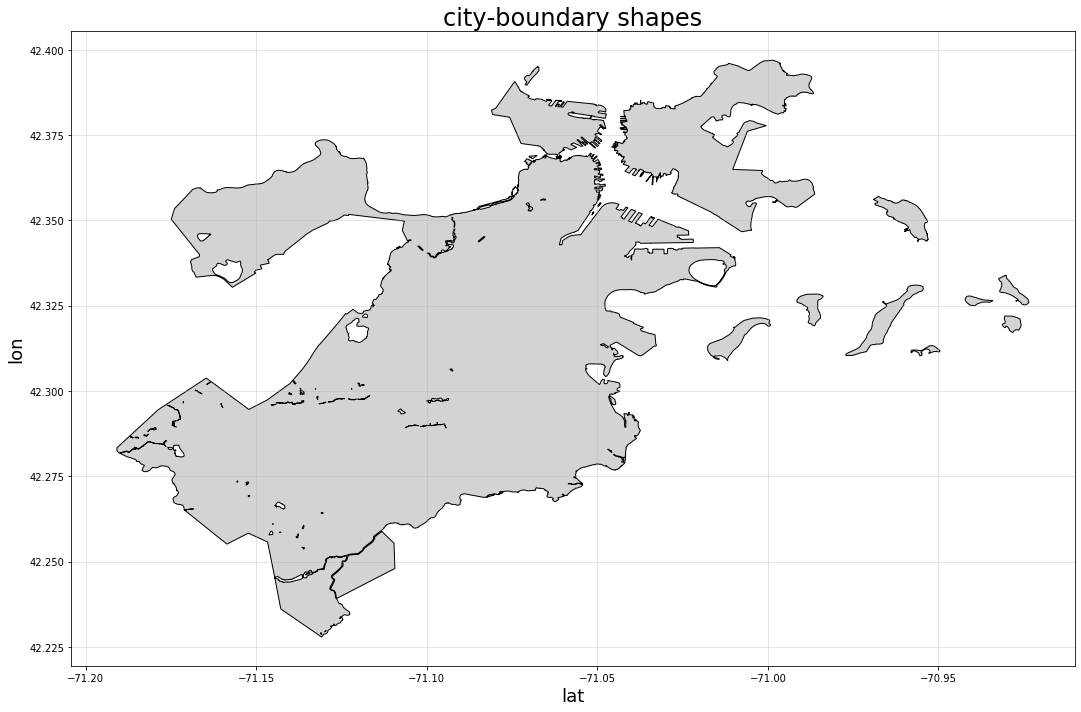

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 7 columns):
OBJECTID      1 non-null int64
BOSTON_LAN    1 non-null int64
CITY          0 non-null object
COUNTY        0 non-null object
SHAPESTAre    1 non-null float64
SHAPESTLen    1 non-null float64
geometry      1 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 136.0+ bytes


,OBJECTID,BOSTON_LAN,CITY,COUNTY,SHAPESTAre,SHAPESTLen,geometry
0,1,1,None,None,1.346516e+09,816364.595339,(POLYGON ((-71.19082598671697 42.2833238215778...


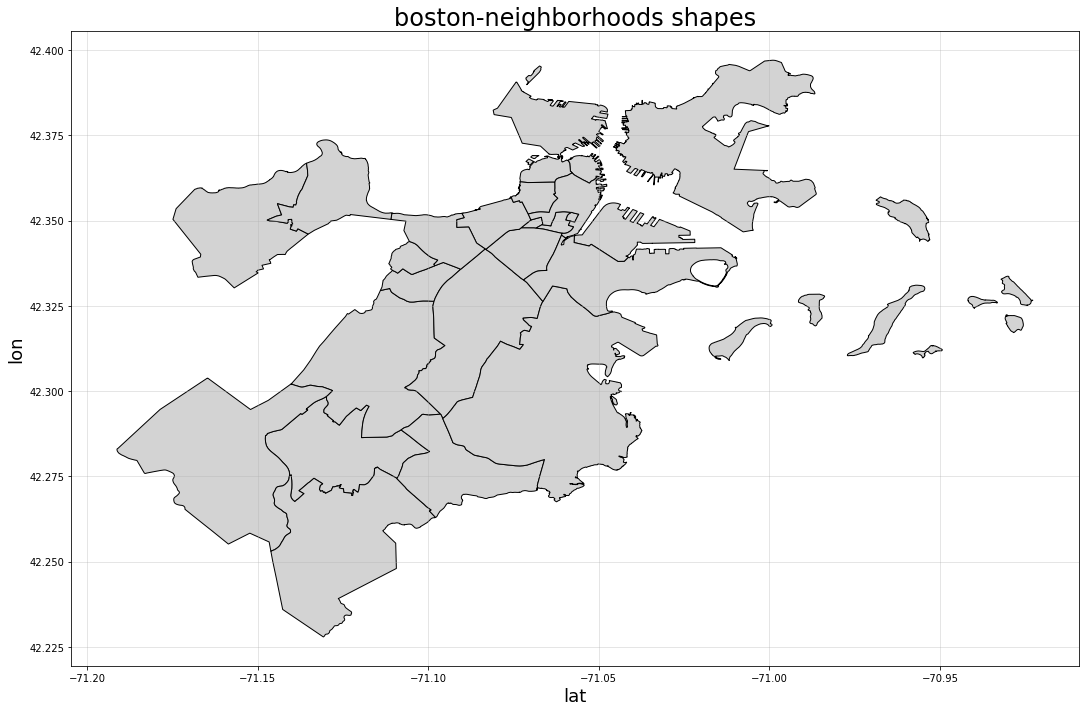

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 8 columns):
OBJECTID      26 non-null int64
Name          26 non-null object
Acres         26 non-null float64
Neighborho    26 non-null object
SqMiles       26 non-null float64
ShapeSTAre    26 non-null float64
ShapeSTLen    26 non-null float64
geometry      26 non-null object
dtypes: float64(4), int64(1), object(3)
memory usage: 1.7+ KB


,OBJECTID,Name,Acres,Neighborho,SqMiles,ShapeSTAre,ShapeSTLen,geometry
0,27,Roslindale,1605.568237,15,2.51,6.993827e+07,53563.912597,(POLYGON ((-71.12592717485386 42.2720131079574...
1,28,Jamaica Plain,2519.245394,11,3.94,1.097379e+08,56349.937161,POLYGON ((-71.10499218689807 42.32610168280807...
2,29,Mission Hill,350.853564,13,0.55,1.528312e+07,17918.724113,"POLYGON ((-71.0904343142608 42.33576996328494,..."
3,30,Longwood,188.611947,28,0.29,8.215904e+06,11908.757148,POLYGON ((-71.09810894210769 42.33673037764089...
4,31,Bay Village,26.539839,33,0.04,1.156071e+06,4650.635493,POLYGON ((-71.06662924918761 42.34878268384542...


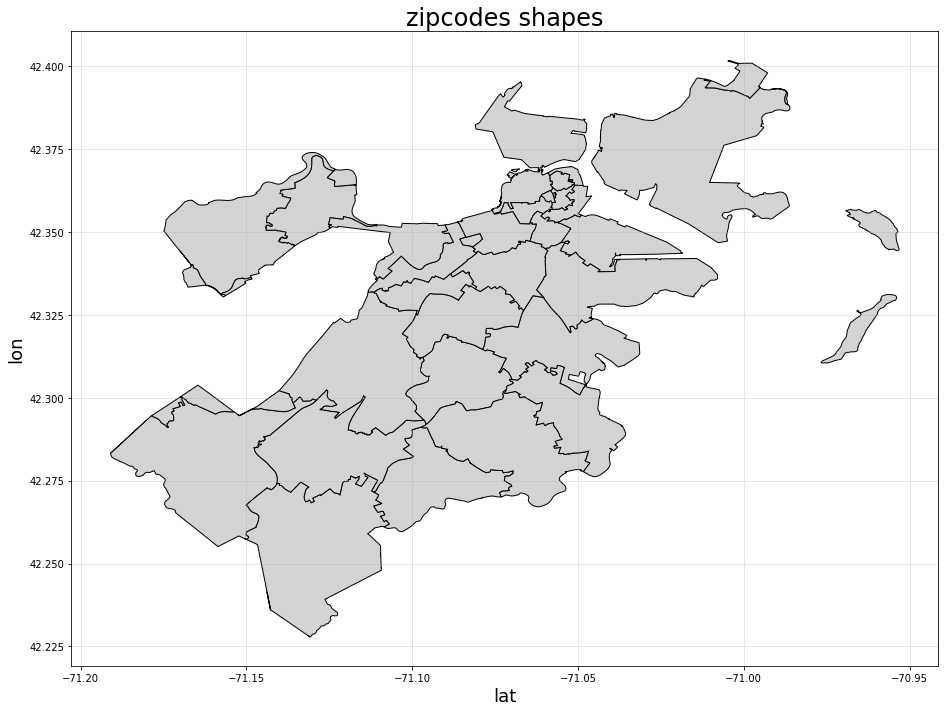

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 5 columns):
OBJECTID      43 non-null int64
ZIP5          43 non-null object
ShapeSTAre    43 non-null float64
ShapeSTLen    43 non-null float64
geometry      43 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 1.8+ KB


,OBJECTID,ZIP5,ShapeSTAre,ShapeSTLen,geometry
0,1,02134,3.721936e+07,40794.182396,POLYGON ((-71.12340461235522 42.36420867214283...
1,2,02125,6.476052e+07,62224.521440,POLYGON ((-71.04541458491363 42.32380666715233...
2,3,02110,6.637284e+06,18358.213496,POLYGON ((-71.05109058896998 42.36418367507441...
3,4,02118,3.116158e+07,32353.407618,POLYGON ((-71.06315159137533 42.34688867055895...
4,5,02126,6.078585e+07,45488.394711,POLYGON ((-71.09669659978795 42.29095065982932...


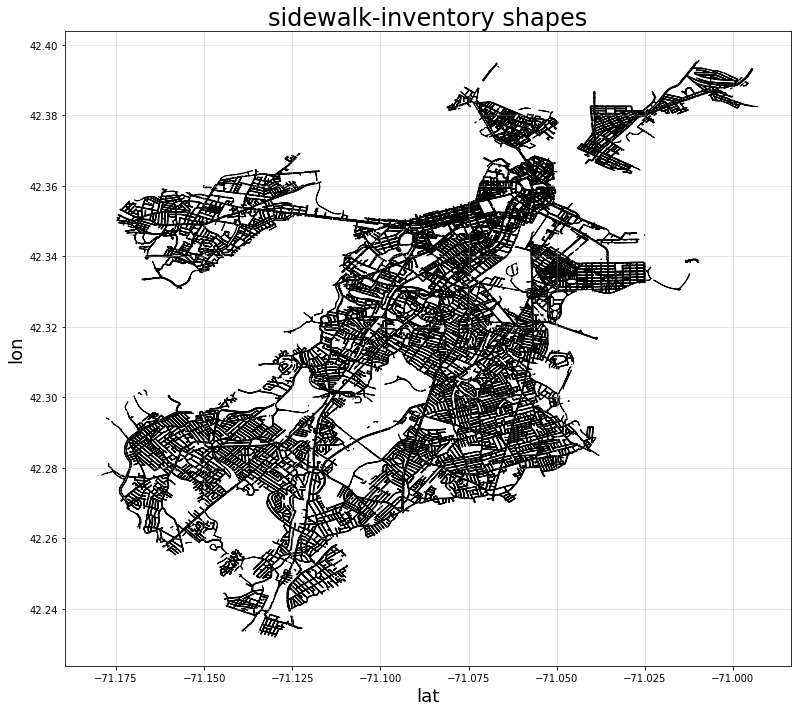

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 24727 entries, 0 to 24726
Data columns (total 33 columns):
OBJECTID      24727 non-null int64
SWK_ID        24727 non-null object
new_insp_d    24727 non-null object
INSP          24487 non-null object
MATERIAL      21380 non-null object
SWK_WIDTH     24708 non-null object
SWK_SLOPE     24705 non-null object
DAM_LENGTH    24303 non-null object
DAM_WIDTH     24637 non-null object
SCI           24727 non-null object
curb_type     22601 non-null object
CURB_REV      24707 non-null object
areaway       7205 non-null object
NOTES         3321 non-null object
add_note      0 non-null object
INSP_DATE     24727 non-null object
DAM_AREA      24727 non-null object
RCR           24727 non-null object
UTIL          21892 non-null object
SURVEY        24727 non-null object
DISTRICT      24727 non-null object
SWK_AREA      24727 non-null object
PARENT        24727 non-null object
Snow_Route    24727 non-null object
SEG_ID        24727 non-nu

,OBJECTID,SWK_ID,new_insp_d,INSP,MATERIAL,SWK_WIDTH,SWK_SLOPE,DAM_LENGTH,DAM_WIDTH,SCI,...,Snow_Route,SEG_ID,SIDE,ROUTE,inspected,Shape_STAr,Shape_STLe,ShapeSTAre,ShapeSTLen,geometry
0,1,1,2013-12-26T00:00:00.000Z,Tan Pham,OT,7,2.2,15,5.5,97.7,...,1A-3-1,ALBIO1_0,LEFT,None,yes,3648.357910,1448.226939,3648.361328,1448.226939,POLYGON ((-71.06965895777878 42.38166759795013...
1,2,2,2013-12-26T00:00:00.000Z,Derek Chan,CC,6,2.5,101,6,47.1,...,1A-3-1,AUBUR1_0,LEFT,None,yes,1145.142090,464.846589,1145.141602,464.846589,"POLYGON ((-71.0697221701561 42.38049426440596,..."
2,3,3,2013-12-26T00:00:00.000Z,Derek Chan,CC,6,3,97,6,63.7,...,1A-3-1,AUBUR1_0,RIGHT,None,yes,1603.231201,529.743387,1603.230713,529.743387,POLYGON ((-71.06946370869757 42.38091277389002...
3,4,4,2013-12-26T00:00:00.000Z,Derek Chan,CC,6,5,30,6,56.2,...,1A-3-1,AUBUR1_612,RIGHT,None,yes,411.096191,145.202968,411.096436,145.202968,"POLYGON ((-71.06867320904345 42.3817941076224,..."
4,5,5,2013-12-26T00:00:00.000Z,Derek Chan,CC,5.5,1.8,25,5.5,86.7,...,1A-3-1,ALBIO1_0,RIGHT,None,yes,1031.328369,418.812686,1031.329102,418.812686,POLYGON ((-71.07001167303362 42.38128597043493...


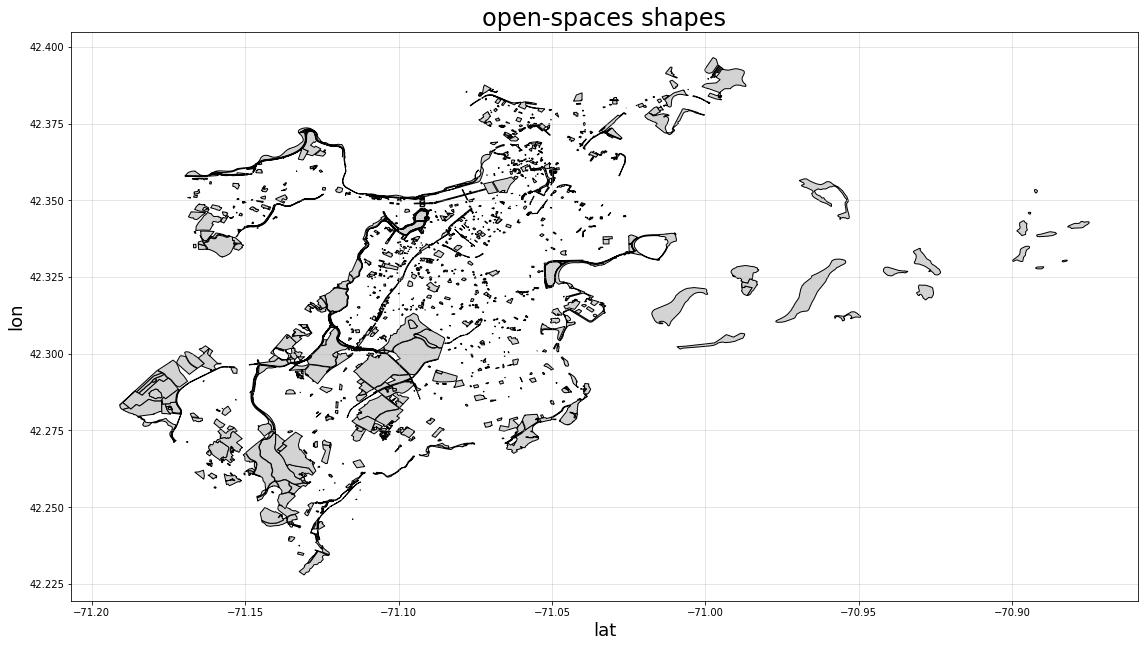

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 23 columns):
OBJECTID      1001 non-null int64
SITE_NAME     1001 non-null object
OWNERSHIP     1001 non-null object
PROTECTION    621 non-null object
TYPECODE      1001 non-null int64
DISTRICT      1001 non-null object
ACRES         1001 non-null float64
ADDRESS       423 non-null object
ZonAgg        987 non-null object
TypeLong      999 non-null object
OS_Own_Jur    960 non-null object
OS_Mngmnt     351 non-null object
POS           1000 non-null object
PA            772 non-null object
ALT_NAME      241 non-null object
AgncyJuris    251 non-null object
Shape_STAr    1001 non-null int64
Shape_STLe    1001 non-null int64
ShapeSTAre    1001 non-null float64
ShapeSTLen    1001 non-null float64
PARK_ID       280 non-null object
REGION        997 non-null object
geometry      1001 non-null object
dtypes: float64(3), int64(4), object(16)
memory usage: 179.9+ KB


,OBJECTID,SITE_NAME,OWNERSHIP,PROTECTION,TYPECODE,DISTRICT,ACRES,ADDRESS,ZonAgg,TypeLong,...,PA,ALT_NAME,AgncyJuris,Shape_STAr,Shape_STLe,ShapeSTAre,ShapeSTLen,PARK_ID,REGION,geometry
0,7819,Wilson Park,City of Boston,None,1,Allston-Brighton,0.097176,Off 1686 Commonwealth Ave.,Open Space District,"Malls, Squares & Plazas",...,X,None,PWD,0,0,4233.046875,256.730008,None,PARK_Maintenance_Region 4,POLYGON ((-71.14584467429913 42.34092442641747...
1,7820,Nickerson Field,Private,None,3,Allston-Brighton,6.345595,None,Institutional District,"Parks, Playgrounds & Athletic Fields",...,N,Boston University Field,None,0,0,276419.033203,2104.702611,None,INFO_Reallocation From Dept,POLYGON ((-71.11844455216783 42.35283600675172...
2,7821,Hooker-Sorrento Street Playground,City of Boston,A97,3,Allston-Brighton,1.005378,120 Hooker Str.,Open Space District,"Parks, Playgrounds & Athletic Fields",...,X,None,None,0,0,43737.350342,852.844112,156,PARK_Maintenance_Region 4,POLYGON ((-71.12517724155171 42.35922420056625...
3,7822,Smith Playground,City of Boston,A97,3,Allston-Brighton,14.797712,235 Western Ave.,Open Space District,"Parks, Playgrounds & Athletic Fields",...,X,None,None,0,0,654457.503418,3624.893621,284,PARK_Maintenance_Region 4,"POLYGON ((-71.13110428094291 42.3631766060812,..."
4,7823,Fern Square,City of Boston,A97,1,Allston-Brighton,0.040543,Opposite 101 Franklin Str.,Open Space District,"Malls, Squares & Plazas",...,X,"James F. Collins Square, Franklin Square",None,0,0,1938.695068,207.320531,115,PARK_Maintenance_Region 4,"POLYGON ((-71.1334124784203 42.35947940004429,..."


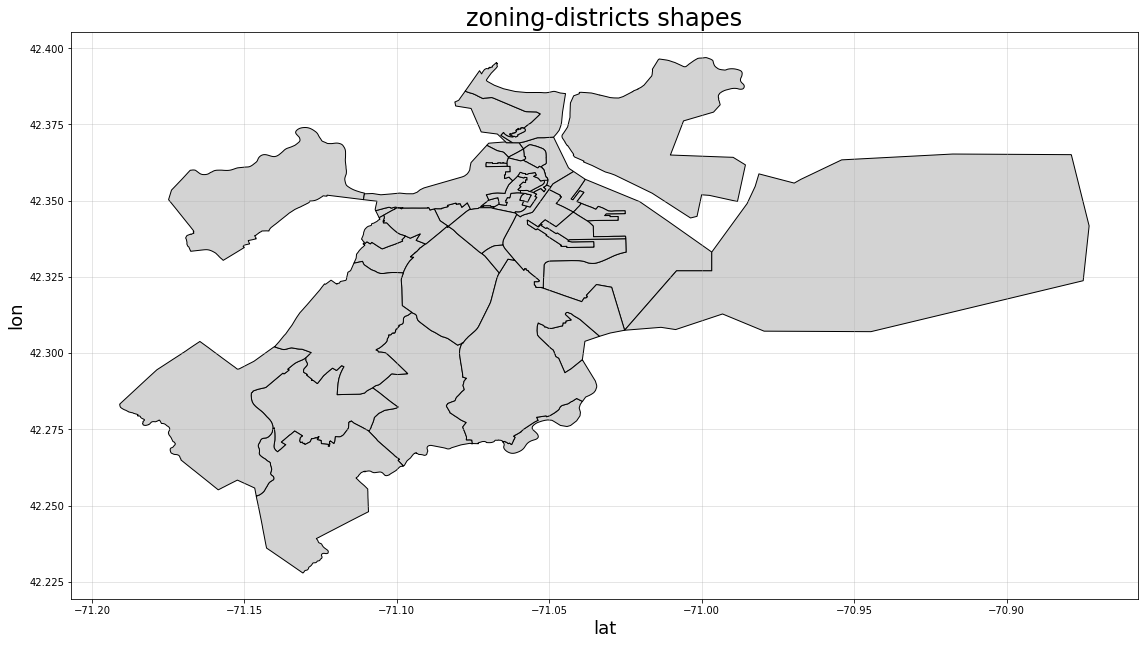

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
OBJECTID_1    36 non-null int64
DISTRICT      36 non-null object
STAGE         36 non-null object
SHAPE_STAr    36 non-null float64
SHAPE_STLe    36 non-null float64
MAPNO         36 non-null object
ARTICLE       36 non-null object
VOLUME        36 non-null object
geometry      36 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 2.6+ KB


,OBJECTID_1,DISTRICT,STAGE,SHAPE_STAr,SHAPE_STLe,MAPNO,ARTICLE,VOLUME,geometry
0,474,Charlestown Neighborhood,Adopted,2.031607e+07,25248.354293,2E,62,Volume III,POLYGON ((-71.07213726671417 42.38365605748405...
1,475,Leather District,Adopted,6.812717e+05,3237.140284,1C/1G/1N,44,Volume II,POLYGON ((-71.05715021982965 42.35213797238359...
2,476,Harborpark: North End Waterfront,Adopted,1.047395e+07,18508.987912,1E-1F,42A,Volume II,POLYGON ((-71.04861318336116 42.37082743632183...
3,477,Cambridge Street North,Adopted,7.984683e+05,4908.021397,1B/1J/1K/1L,47A,Volume II,POLYGON ((-71.06983134098546 42.36242383480777...
4,478,Harborpark: Charlestown Waterfront,Adopted,2.873751e+07,38889.395007,2B/2C,42B,Volume II,POLYGON ((-71.06705998607308 42.39394118113359...


In [6]:
# plot all shapefiles for comparison and examine info and head for each dataframe
for subdir in shapefile_subdirs:
    plot_shapefile(shapefiles_dict[subdir], subdir, savefig=False)
    shapefiles_dict[subdir].info()
    shapefiles_dict[subdir].head()